In [1]:
import wikipedia_helpers
import re
import pandas as pd
import gensim.utils
import word2vec
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import KeyedVectors


In [ ]:
from bertopic import BERTopic
from top2vec import Top2Vec



In [1]:
# path to save wikipedia texts to or load from if file already existing
path = "data/komponisten_texte.json"

# create dictionary with composers as keys and \
# for each key a dictionary with the texts of the wikipedia articles \
# in the languages german, arabic, english, italian, french and spanish
data_dict = wikipedia_helpers.extract_composers_texts(path)

NameError: name 'wikipedia_helpers' is not defined

In [405]:
df = pd.read_json(path)
# transpose index and columns of df
df = df.transpose()
df

,de_title,de_text,en_title,en_text,ar_title,ar_text,fr_title,fr_text,it_title,it_text,es_title,es_text
1,Abel Ehrlich,Abel Ehrlich (* 3. September 1915 in Cranz/Ost...,Abel Ehrlich,"Abel Ehrlich (Hebrew: אבל ארליך; September 3,...",أبيل إرليخ,أبيل إرليخ (بالعبرية: אבל ארליך‏) هو ملحن إسرا...,Abel Ehrlich,"Abel Ehrlich (hébreu : אבל ארליך ; Cranz, 3 se...",,,,
2,Admiral Horthy,Miklós (Nikolaus) Horthy von Nagybánya [ˈmiklo...,Miklós Horthy,Miklós Horthy de Nagybánya (Hungarian: Vitéz n...,ميكلوش هورتي,ميكلوش هورتي (بالمجرية: Horthy Miklós) ‏(18 يو...,Miklós Horthy,L'amiral Miklós Horthy de Nagybánya (hongrois ...,Miklós Horthy,"Miklós Horthy de Nagybánya (Kenderes, 18 giugn...",Miklós Horthy,"Miklós Horthy de Nagybánya —en español, Nicolá..."
3,Alexander von Zemlinsky,"Alexander (von) Zemlinsky, Pseudonym Al Robert...",Alexander von Zemlinsky,Alexander Zemlinsky or Alexander von Zemlinsky...,ألكسندر فون زيميلنسكي,ألكسندر فون زيميلنسكي (بالألمانية: Alexander v...,Alexander von Zemlinsky,Alexander (von) Zemlinsky est un compositeur a...,Alexander von Zemlinsky,"Alexander Zemlinsky (Vienna, 14 ottobre 1871 –...",Alexander von Zemlinsky,Alexander von Zemlinsky (14 de octubre de 1872...
4,Alexandre Tansman,Alexandre Tansman (französisch Alexandré Tansm...,Alexandre Tansman,"Alexander Tansman (Polish: Aleksander Tansman,...",,,Alexandre Tansman,"Alexandre Tansman, né le 11 juin 1897 à Łódź (...",Alexandre Tansman,"Alexandre Tansman (Łódź, 12 giugno 1897 – Pari...",Alexandre Tansman,"Alexandre Tansman (Lodz, Polonia,12 de junio d..."
5,Alfons Josef Biron,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
309,Zikmund Schul,Zikmund Schul (* 11. Januar 1916 in Chemnitz; ...,Zikmund Schul,Zikmund Schul (11 January 1916 – 2 June 1944) ...,,,Zikmund Schul,"Zikmund Schul, né à Chemnitz (Allemagne) le 11...",Zikmund Schul,"Zikmund Schul (Chemnitz, 11 gennaio 1916 – cam...",,
310,Zweiter Weltkrieg,Als Zweiter Weltkrieg (1. September 1939 – 2. ...,World War II,"World War II or the Second World War, often ab...",الحرب العالمية الثانية,الحرب العالمية الثانية هي حرب دولية بدأت في ال...,Seconde Guerre mondiale,"La Seconde Guerre mondiale, ou Deuxième Guerre...",Seconda guerra mondiale,"La seconda guerra mondiale vide contrapporsi, ...",Segunda Guerra Mundial,La Segunda Guerra Mundial fue un conflicto mil...
311,Émile Goué,,,,,,,,,,,
312,Ödön Pártos,"Ödön Pártos (* 1. Oktober 1907 in Budapest, Ös...",Ödön Pártos,Ödön Pártos [alternate transcription in Englis...,أودون بارتوس,إيدين بارتوش (بالعبرية: עֵדֶן פרטוש) (1 أكتوبر...,,,,,,


In [329]:
df.shape

(313, 12)

In [371]:
#df.de_title

In [ ]:
####################################################################################################################################
####################################################################################################################################
# Methods to get Word Embeddings

In [451]:
####################################################################################################################################
# Using Word2Vec
# preprocessing the texts necessary
de_texts_processed = df.de_text.apply(gensim.utils.simple_preprocess)
en_texts_processed = df.en_text.apply(gensim.utils.simple_preprocess)
ar_texts_processed = df.ar_text.apply(gensim.utils.simple_preprocess)
fr_texts_processed = df.fr_text.apply(gensim.utils.simple_preprocess)
es_texts_processed = df.es_text.apply(gensim.utils.simple_preprocess)
it_texts_processed = df.it_text.apply(gensim.utils.simple_preprocess)

multilingual_texts_processed = []
for lang in [de_texts_processed, en_texts_processed, ar_texts_processed, fr_texts_processed, es_texts_processed, it_texts_processed]:
    for sentences in lang:
        for words in sentences:
            multilingual_texts_processed.append(words)
multilingual_texts_processed

['abel',
 'ehrlich',
 'september',
 'in',
 'cranz',
 'ostpreußen',
 'oktober',
 'in',
 'tel',
 'aviv',
 'war',
 'ein',
 'israelischer',
 'komponist',
 'ehrlich',
 'aufgewachsen',
 'in',
 'einer',
 'deutschen',
 'jüdischen',
 'familie',
 'floh',
 'nach',
 'dem',
 'abitur',
 'in',
 'königsberg',
 'nach',
 'jugoslawien',
 'er',
 'studierte',
 'an',
 'der',
 'musikakademie',
 'zagreb',
 'komposition',
 'und',
 'violine',
 'bei',
 'vaclav',
 'huml',
 'emigrierte',
 'er',
 'über',
 'albanien',
 'in',
 'das',
 'damalige',
 'palästina',
 'ab',
 'studierte',
 'er',
 'am',
 'konservatorium',
 'jerusalem',
 'bei',
 'emil',
 'hauser',
 'tzvi',
 'rothenberg',
 'und',
 'solomon',
 'rosowski',
 'er',
 'selbst',
 'unterrichtete',
 'danach',
 'an',
 'verschiedenen',
 'musikakademien',
 'in',
 'jerusalem',
 'und',
 'tel',
 'aviv',
 'darunter',
 'auch',
 'von',
 'bis',
 'an',
 'der',
 'kibbuzim',
 'hochschule',
 'in',
 'oranim',
 'wurde',
 'er',
 'professor',
 'an',
 'der',
 'damaligen',
 'rubin',
 'akad

In [431]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)
# experiment with parameters, e.g. window=5

In [432]:
model.build_vocab(multilingual_texts_processed, progress_per=10)

In [433]:
model.epochs

5

In [434]:
model.train(multilingual_texts_processed, total_examples=model.corpus_count, epochs=model.epochs)

(5804297, 27688015)

In [452]:
#model.save("word2vec_multilingual.model")
model = gensim.models.Word2Vec.load("word2vec_multilingual.model")

In [1]:
#variant 2: save model with keyed vectors
word_vectors = model.wv
#word_vectors.save('vectors.kv')
reloaded_word_vectors = KeyedVectors.load('vectors.kv')
word2vec.get_word_in_static_embbedings(word_vectors, multilingual_texts_processed, save_path="word2vec_kv_models/word2vec_kv_model")

NameError: name 'model' is not defined

In [445]:
# find words used in similar context
model.wv.most_similar("jewish")

KeyError: "Key 'jewish' not present in vocabulary"

In [424]:
model.wv.similarity(w1="jude", w2="jew") 
#model.wv.distance("violinist", "pianist")

0.7225582

In [426]:
model.wv.similarity(w1="composer", w2="musician") 

0.9202845

In [416]:
model.wv.doesnt_match(['pianist', 'violinist', 'nazi'])

'nazi'

In [428]:
model.wv.most_similar(positive=["komponist", "jude"], negative=["schönberg"])

[('ungarischer', 0.9120594263076782),
 ('amerikanischer', 0.882872998714447),
 ('qs', 0.873246967792511),
 ('österreichisch', 0.8693883419036865),
 ('ausgerichtet', 0.8675851225852966),
 ('blockade', 0.866719663143158),
 ('ungarn', 0.8636912107467651),
 ('polnisch', 0.8601006865501404),
 ('mongol', 0.8569046258926392),
 ('sogenanntes', 0.8568978309631348)]

In [364]:
####################################################################################################################################
####################################################################################################################################
# Topic Modeling
# merge texts together for each language
de_documents = df.de_text.values.tolist()
en_documents = df.en_text.values.tolist()
ar_documents = df.ar_text.values.tolist()
fr_documents = df.fr_text.values.tolist()
es_documents = df.es_text.values.tolist()
it_documents = df.it_text.values.tolist()


# create list of documents of all languages
multilingual_documents = []
for language_documents in [de_documents, en_documents, ar_documents, fr_documents, es_documents, it_documents]:
    for document in language_documents:
        if document == "":
            continue
        multilingual_documents.append(document)

In [386]:
# Getting sentences from text
multilingual_all_sentences = []
for document in multilingual_documents:
    sentences = nltk.sent_tokenize(document)
    for sentence in sentences:
        multilingual_all_sentences.append(sentence)

In [394]:
####################################################################################################################################
# Using Top2Vec 
# distiluse-base-multilingual-cased pre-trained sentence transformer recommended for multilingual datasets
# TODO: further cleaning/ preprocessing of text might be needed!?
# embedding_model='distiluse-base-multilingual-cased' is sentence transformer model!
# no specified will use doc2vec method -> not multilingual
top2vec_model = Top2Vec(multilingual_documents, verbose=True, ngram_vocab=True, embedding_model='distiluse-base-multilingual-cased')
top2vec_model.save("Top2Vec_model")

2022-06-12 17:12:22,817 - top2vec - INFO - Pre-processing documents for training
2022-06-12 17:12:27,760 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-06-12 17:12:38,563 - top2vec - INFO - Creating joint document/word embedding
2022-06-12 17:19:37,282 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-12 17:19:41,687 - top2vec - INFO - Finding dense areas of documents
2022-06-12 17:19:41,706 - top2vec - INFO - Finding topics


In [395]:
#top2vec_model = Top2Vec.load("Top2Vec_model")
top2vec_model.get_num_topics()

2

In [396]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(topic_nums)
print(topic_sizes)

[0 1]
[837  40]


In [397]:
words, word_scores = top2vec_model.similar_words(keywords=["emigrierte"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

il emigre 0.9580605202244928
emigre 0.9514200584458979
immigrated to 0.920229459360097
emigration 0.9114499093109452
migrated to 0.9069707619415777
emigrating to 0.9026536477511646
emigrate to 0.8998076879080656
emigre aux 0.8787879085263065
die auswanderer 0.8557944766487117
seiner emigration 0.8478597334984057
emigrated to 0.8466857604786454
to emigrate 0.8389105991010922
emigrierte er 0.8312371317032857
he emigrated 0.8133874048830254
die vertreibung 0.812275300328788
deportation 0.7977199235650563
inneren emigration 0.7792356435684433
innere emigration 0.7661888279123934
fue deportado 0.7635928500060394
osterreich emigrierten 0.7605282966102563


None
None


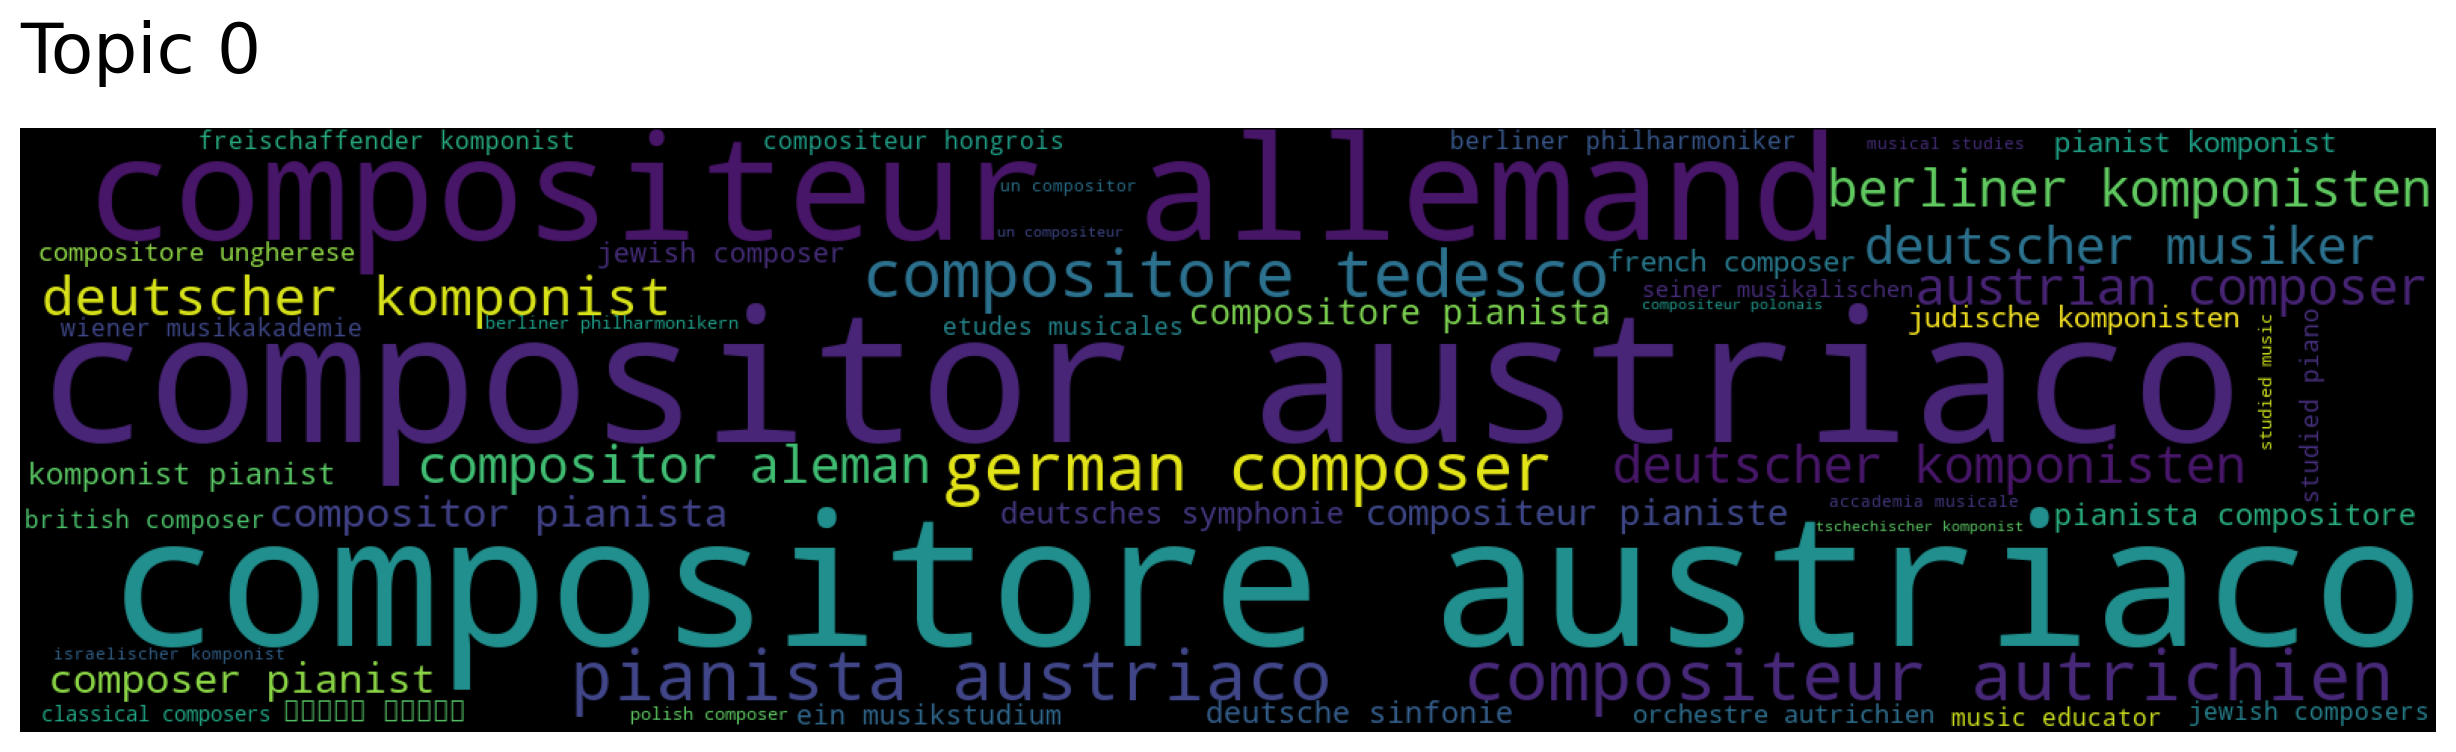

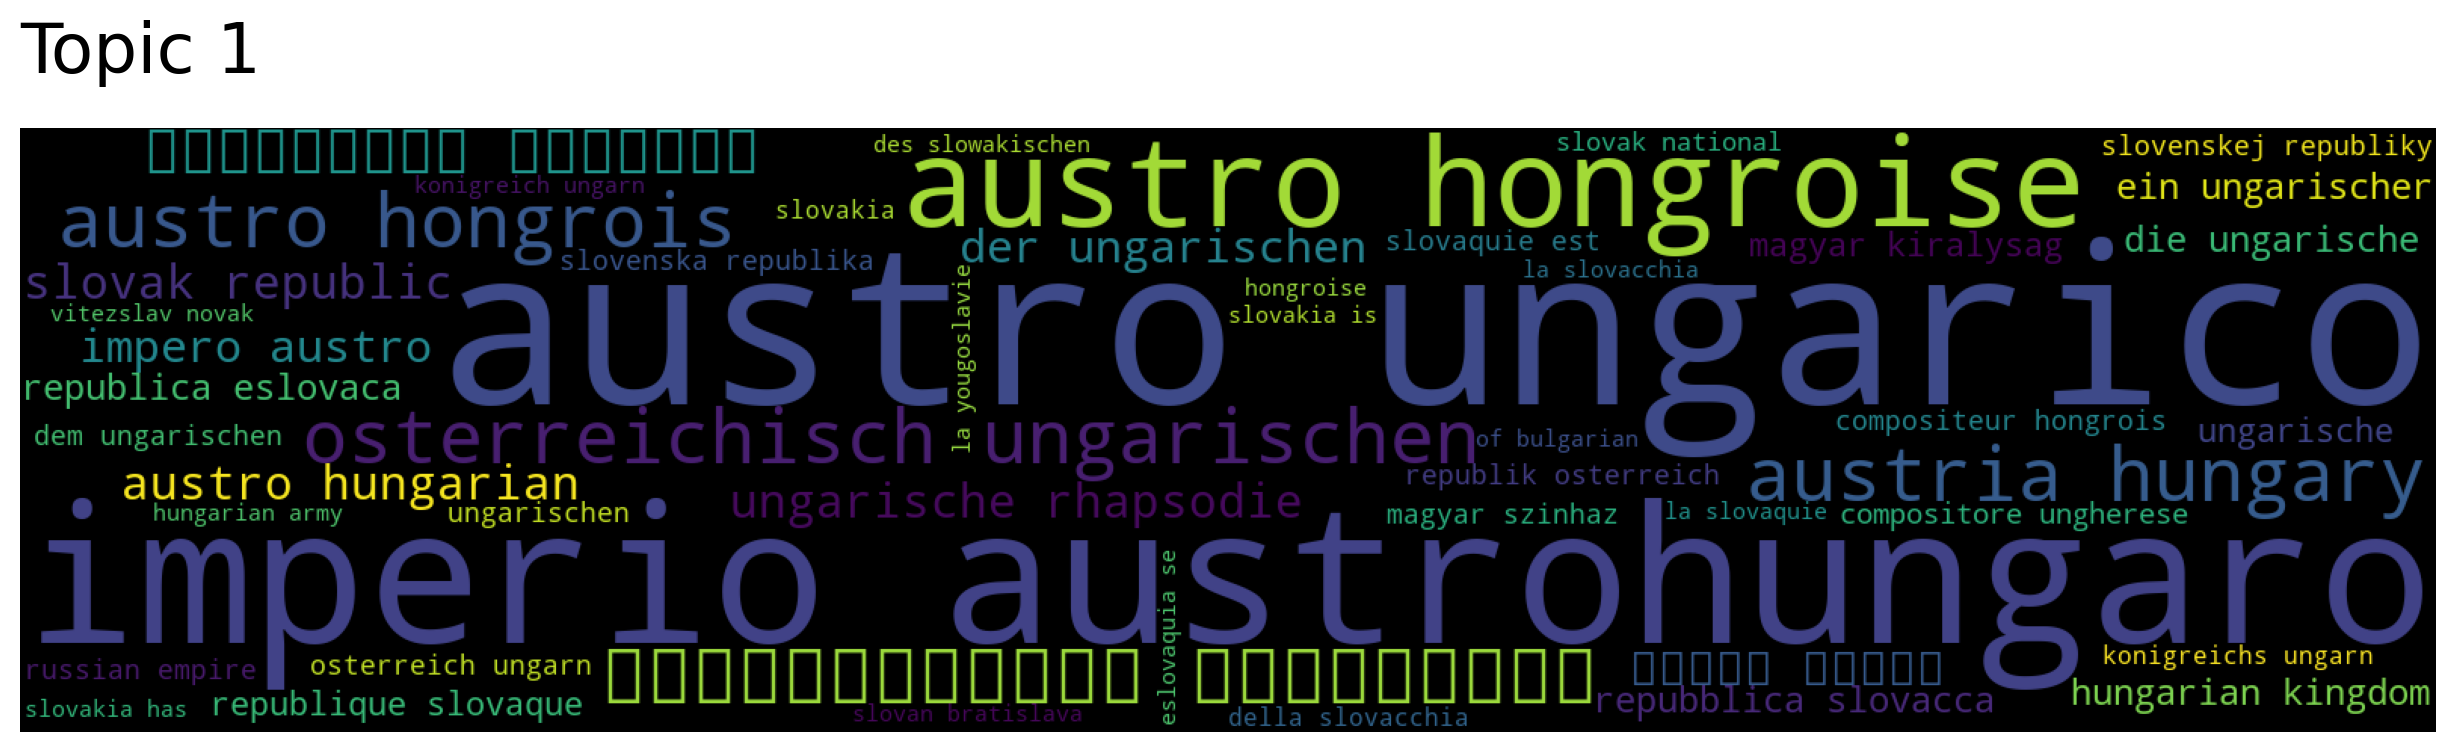

In [398]:
for topic in range(top2vec_model.get_num_topics()):
    print(top2vec_model.generate_topic_wordcloud(topic))

In [366]:
####################################################################################################################################
# Using BERTopic
# Train model on documents with mixed languages
stop_words = stopwords.words('german') + stopwords.words('english') + stopwords.words('arabic') + stopwords.words('french') + stopwords.words('italian') + stopwords.words('spanish')
vectorizer_model = CountVectorizer(stop_words=stop_words)
topic_model = BERTopic(verbose=True, language="multilingual", vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(multilingual_documents)
topic_model.save("BERTopic_model_multilingual")

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

2022-06-12 16:09:59,596 - BERTopic - Transformed documents to Embeddings
2022-06-12 16:10:03,398 - BERTopic - Reduced dimensionality
2022-06-12 16:10:03,431 - BERTopic - Clustered reduced embeddings


In [339]:
topic_model = BERTopic.load("BERTopic_model_multilingual")

In [340]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,196,-1_op_bartók_pub_music
1,0,112,0_weill_zemlinsky_piano_music
2,1,94,1_op_kreisler_korngold_piano
3,2,47,2_schönberg_schnabel_ksv_schoenberg
4,3,43,3_martinů_haas_milhaud_jessel
5,4,37,4_000_hitler_guerra_reich
6,5,34,5_stravinsky_stravinskij_ms_vladigerov
7,6,33,6_steffan_steuermann_spoliansky_wien
8,7,32,7_webern_hartmann_anton_klein
9,8,26,8_tal_israel_ben_nadel


In [341]:
topic_model.visualize_topics()

In [401]:
topic_model.transform("Er ist ein jüdischer Komponist.")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-06-12 17:21:18,870 - BERTopic - Reduced dimensionality
2022-06-12 17:21:18,871 - BERTopic - Predicted clusters


([8], array([0.65891436]))

In [342]:
# Update topic representation by increasing n-gram range and removing stopwords
cv = CountVectorizer(ngram_range=(1, 3), stop_words=stop_words)
topic_model.update_topics(multilingual_documents, topics, vectorizer_model=cv)

In [343]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,196,-1_op_bartók_music_pub
1,0,112,0_weill_zemlinsky_piano_music
2,1,94,1_op_kreisler_korngold_piano
3,2,47,2_schönberg_schnabel_ksv_schoenberg
4,3,43,3_martinů_haas_milhaud_op
5,4,37,4_000_hitler_guerra_reich
6,5,34,5_stravinsky_stravinskij_ms_igor
7,6,33,6_steffan_steuermann_ernst steffan_spoliansky
8,7,32,7_webern_hartmann_anton_anton webern
9,8,26,8_tal_israel_music_ben


In [403]:
for i in range(len(topic_model.get_topic_info())):
    print(f"Thema {i-1}")
    list = topic_model.get_topic(i-1)
    for elem in list:
        print(elem)
    print()

Thema -1
('bartók', 0.014588034073710529)
('pub', 0.012484218450721878)
('op', 0.01229632716706226)
('piano', 0.010902920788159862)
('music', 0.00973824579589759)
('orchestra', 0.009664843772616697)
('hindemith', 0.008915403871996741)
('isbn', 0.007873238193424292)
('zemlinsky', 0.007323596102223169)
('musik', 0.0070880358721594336)

Thema 0
('webern', 0.02676431127389778)
('steiner', 0.02525575956369461)
('op', 0.0215227295029953)
('music', 0.01655008718956127)
('piano', 0.014383954354701361)
('weissmann', 0.01251488427151069)
('orchestra', 0.01143386231462017)
('film', 0.011040090347961154)
('gál', 0.0106745331734427)
('anton', 0.010398546730484981)

Thema 1
('op', 0.02842459917199422)
('kreisler', 0.024651340042651043)
('korngold', 0.020548633308257173)
('piano', 0.015866699056706197)
('wien', 0.013493933129504549)
('music', 0.011705552271962514)
('krenek', 0.010293804088160935)
('isbn', 0.010001729608439168)
('leopoldi', 0.009887333908428234)
('kaprálová', 0.009512913195281348)

Th

In [344]:
topic_model.visualize_topics()